<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

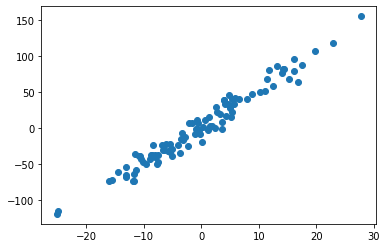

In [73]:
import numpy as np
import matplotlib.pyplot as plt
 
# dataset generation
data = np.zeros((100,2))
 
for i in range(len(data)):
  data[i][0] = 10*np.random.randn(1)
  data[i][1] = 5*data[i,0] + 2 + 10*np.random.randn(1)
 
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= 19583.240556538476 w= -8.932098652880736 b= 19.562142294501175
iteration: 100 loss= 103.56040533072998 w= 5.023491393768691 b= 5.072315753743227
iteration: 200 loss= 98.46560005183171 w= 5.064400830819715 b= 3.1400723168905524
iteration: 300 loss= 98.37947494408479 w= 5.0636598515359115 b= 2.8831876891765953
iteration: 400 loss= 98.37795298450857 w= 5.063540302777281 b= 2.849038486580001
iteration: 500 loss= 98.37792608859405 w= 5.063524338800308 b= 2.8444988388734656
iteration: 600 loss= 98.37792561329228 w= 5.063522216374033 b= 2.843895357717863
iteration: 700 loss= 98.37792560489281 w= 5.063521934227021 b= 2.843815133540076
iteration: 800 loss= 98.37792560474438 w= 5.063521896719614 b= 2.8438044688844513
iteration: 900 loss= 98.37792560474176 w= 5.063521891733539 b= 2.8438030511712045
iteration: 1000 loss= 98.37792560474172 w= 5.063521891070714 b= 2.8438028627065304


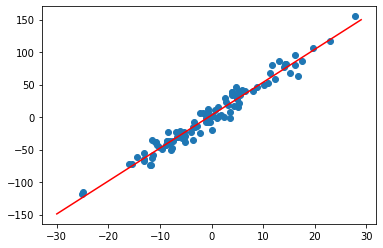

In [74]:
# y = 3x + 2 --> y = wx + b : find w and b
# error = true - pred
# MSE loss = (true - pred)**2
def loss_function (w,b):
  return sum((y-w*x-b)**2 for x, y in data)/len(data)
 
def w_grad_loss(w,b):
  return sum(2*(y-w*x-b)*(-x) for x,y in data )/len(data)
 
def b_grad_loss(w,b):
  return sum(2*(y-w*x-b)*(-1) for x,y in data )/len(data)
 
# initial parameters
w = 20.00001
b = 20.00001
 
# learning rate
lr= 0.01 
 
fig = plt.figure()
for i in range(1000+1):
  w = w - lr*w_grad_loss(w,b)
  b = b - lr*b_grad_loss(w,b)
  if i%100 == 0:
    print('iteration:', i, 'loss=', loss_function(w,b), 'w=', w, 'b=', b)
 
# plot result
x_coor = []
y_coor = []
iter=0
for i in range(-30,30,1):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b)
  iter+=1
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= 19585.897644365086 w= -8.933071045179279 b= 19.5621257118876
iteration: 10 loss= 6450.313287060504 w= -2.851409307853576 b= 16.51872996205955
iteration: 20 loss= 2202.110168865562 w= 0.5913364770560996 b= 14.026386055389846
iteration: 30 loss= 817.0464433935973 w= 2.5395493250835237 b= 11.986599077422422
iteration: 40 loss= 358.0764207182921 w= 3.641467011254374 b= 10.317918611400525
iteration: 50 loss= 201.12663944733694 w= 4.264262338673486 b= 8.953237568677277
iteration: 60 loss= 144.31144894824166 w= 4.615889678242436 b= 7.837405407196368
iteration: 70 loss= 121.77340344441409 w= 4.81411229879458 b= 6.925175968963114
iteration: 80 loss= 111.66559969365166 w= 4.925606449291873 b= 6.179472798070005
iteration: 90 loss= 106.50185217189133 w= 4.9881133732822285 b= 5.569938856839823
iteration: 100 loss= 103.56249669351337 w= 5.0229877589076715 b= 5.071732795859443


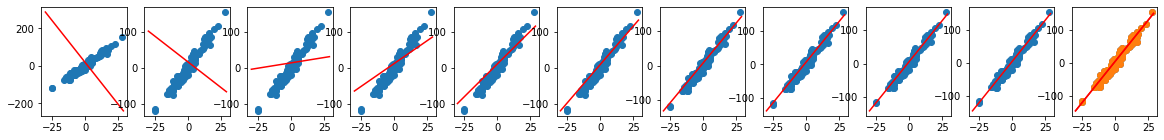

In [75]:
# y = 3x + 2 --> y = ax + c : find a and c
# error = true - pred
# MSE loss = (true - pred)**2
 
def loss_function (w,b):
  return sum((y-w*x-b)**2 for x, y in data)/len(data)
 
def grad_loss(w,b, w_h, b_h):
  return  (loss_function(w+w_h,b+b_h) - loss_function(w,b))/h 
  
w = 20.00001
b = 20.00001
lr= 0.01 # learning rate
h = 0.001
 
plt.figure(figsize=(20,2))
plt_cnt=1

for i in range(100+1):
  w = w - lr*grad_loss(w, b, h, 0)
  b = b - lr*grad_loss(w, b, 0, h)
  
  # 100회 반복마다 손실값 및 w, b 출력
  if i%10 == 0:
    print('iteration:', i, 'loss=', loss_function(w,b), 'w=', w, 'b=', b)
    iter=0
    x_coor = []
    y_coor = []
    plt.subplot(1,11,plt_cnt)
    for j in range(-30,30,1):
      x_coor.append (j)
      y_coor.append (w*x_coor[iter] + b)
      iter+=1 
    plt.plot(x_coor, y_coor, 'r')
    plt.scatter(data[:,0], data[:,1])
    
    plt_cnt+=1

 
x_coor = []
y_coor = []
iter=0
for i in range(-30,30,1):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b)
  iter+=1 
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1], cmap='b')
plt.show()


iteration:  0 loss= tf.Tensor(19594.258, shape=(), dtype=float32) w= -8.933025 b= 19.758974
iteration:  1000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  2000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  3000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  4000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  5000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  6000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  7000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  8000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  9000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522 b= 2.843809
iteration:  10000 loss= tf.Tensor(98.37792, shape=(), dtype=float32) w= 5.063522

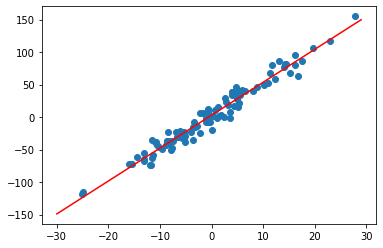

In [80]:
import tensorflow as tf
 
# w,b 변수 설정 및 초기화
w = tf.Variable(initial_value=20.001)
b = tf.Variable(initial_value=20.001)
 
x = data[:,0]
y = data[:,1]
 
# 손실함수 정의: MSE
def loss_function(x,y):
  pred = w*x+b
  return tf.reduce_mean(tf.math.square(y - pred))
 
# 최적화 함수 정의: SGD
optimizer=tf.optimizers.SGD(learning_rate=0.01)
 
# 학습모델 정의
def train():
  with tf.GradientTape() as g:
    loss = loss_function(x,y)
  gradients = g.gradient(loss, [w,b])
  optimizer.apply_gradients(zip(gradients, [w,b]))
 
for i in range(10000+1):
 
  train()
  
  # 100회 반복마다 손실값 및 w, b 출력
  if i%1000 == 0:
    loss = loss_function(x,y)
    print('iteration: ', i, 'loss=', loss, 'w=', w.numpy(), 'b=', b.numpy())
 
# 결과 출력
x_coor = []
y_coor = []
iter=0
w = w.numpy()
b = b.numpy()
for i in range(-30,30):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b) 
  iter+=1
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= tensor(2695.3735, grad_fn=<MseLossBackward>) param= tensor([[10.0241]]) tensor([-0.4762])
iteration: 100 loss= tensor(100.2813, grad_fn=<MseLossBackward>) param= tensor([[5.1899]]) tensor([2.4133])
iteration: 200 loss= tensor(98.3823, grad_fn=<MseLossBackward>) param= tensor([[5.0666]]) tensor([2.7878])
iteration: 300 loss= tensor(98.3780, grad_fn=<MseLossBackward>) param= tensor([[5.0636]]) tensor([2.8365])
iteration: 400 loss= tensor(98.3779, grad_fn=<MseLossBackward>) param= tensor([[5.0635]]) tensor([2.8429])
iteration: 500 loss= tensor(98.3779, grad_fn=<MseLossBackward>) param= tensor([[5.0635]]) tensor([2.8437])
iteration: 600 loss= tensor(98.3779, grad_fn=<MseLossBackward>) param= tensor([[5.0635]]) tensor([2.8438])
iteration: 700 loss= tensor(98.3779, grad_fn=<MseLossBackward>) param= tensor([[5.0635]]) tensor([2.8438])
iteration: 800 loss= tensor(98.3779, grad_fn=<MseLossBackward>) param= tensor([[5.0635]]) tensor([2.8438])
iteration: 900 loss= tensor(98.377

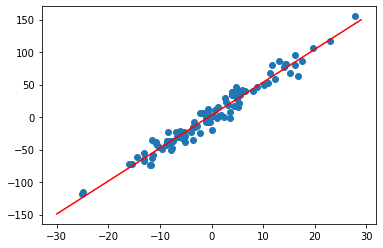

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F
 
# 학습모델 정의
class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단일 선형 회귀이므로 input_dim=1, output_dim=1.
 
    def forward(self, x):
        return self.linear(x)
 
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
 
# 파이토치 포맷으로 변환
in_x = torch.FloatTensor(x)
in_y = torch.FloatTensor(y)
 
# 회귀 모델 선언
model = Linear_Regression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.01, nesterov=True) 
weight = []
 
for i in range(1000+1):
  pred = model(in_x)
  loss = F.mse_loss(pred, in_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
 
  # 100회 반복마다 손실값 및 w, b 출력
  if i%100 == 0:
    for param in model.parameters():
      weight.append (param.data)
    print('iteration:', i, 'loss=', loss, 'param=', weight[0], weight[1]) 
 
# 결과 출력
x_coor = []
y_coor = []
a = weight[0]
c = weight[1]
iter=0
for i in range(-30,30):
  x_coor.append (i)
  y_coor.append (a*x_coor[iter] + c)
  iter+=1 
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

In [77]:
import torch
print(torch.__version__)

1.5.1+cu101


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [81]:
from sklearn.linear_model import LinearRegression
 
X = data[:,0].reshape(-1, 1)
Y = data[:,1]
 
model = LinearRegression().fit(X, Y)
print('W=', model.coef_, 'b=',model.intercept_)

W= [5.06352189] b= 2.843802833811692
